In [9]:
import pandas as pd                                    # pandas, matplotlib.pyplot, seaborn: Libraries are used for Data wrangling and visualization.
import matplotlib.pyplot as plt                        # wordcloud, nltk, re:Libraries are Used For Text preprocessing and natural language processing.
import seaborn as sns                                  # stopwords: For filtering common English words during word cloud creation.
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')                          # Ensures stopwords are available for word filtering.
sns.set(style="whitegrid")                         # Sets Seaborn style for clean visualizations. 

# Your data loading and processing code follows...


# Loads Excel data from a specific sheet (chatgpt_reviews) into a DataFrame df.
df = pd.read_excel(r"C:\Users\wel\Downloads\chatgpt_reviews.xlsx", sheet_name="chatgpt_reviews")
 #
# Displays number of missing values per column.
print("Missing values:\n", df.isnull().sum())

# Fill missing reviews with empty string
df['Review'] = df['Review'].fillna('')

# Convert Review_Date to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')

# Ensure Ratings is numeric
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')

# Remove rows where essential data is missing
df_clean = df.dropna(subset=['Ratings', 'Review Date'])

# Check missing values again
print("Missing values after cleaning:\n", df_clean.isnull().sum())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Missing values:
 Review Id      0
Review         6
Ratings        0
Review Date    0
dtype: int64
Missing values after cleaning:
 Review Id      0
Review         0
Ratings        0
Review Date    0
dtype: int64


C:\Users\wel\AppData\Local\Temp\ipykernel_10976\2010723894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Ratings', palette='viridis')


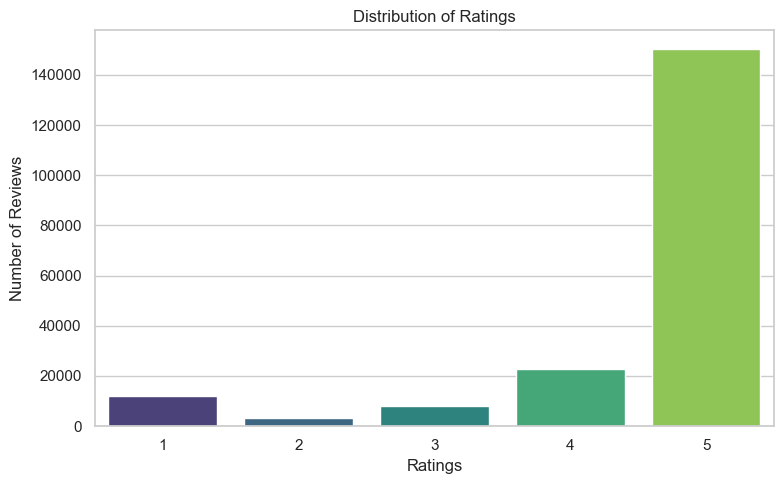

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='Ratings', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


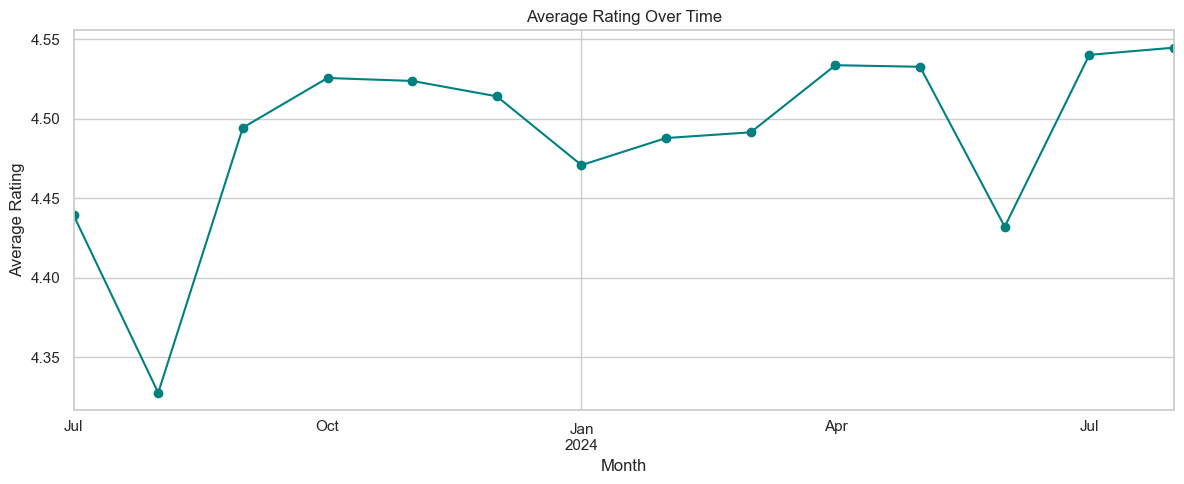

In [11]:
df_clean['Review Month'] = df_clean['Review Date'].dt.to_period('M')
monthly_avg_rating = df_clean.groupby('Review Month')['Ratings'].mean()
monthly_avg_rating.plot(marker='o', figsize=(12, 5), color='teal', title="Average Rating Over Time")
plt.grid(True)
plt.ylabel('Average Rating')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

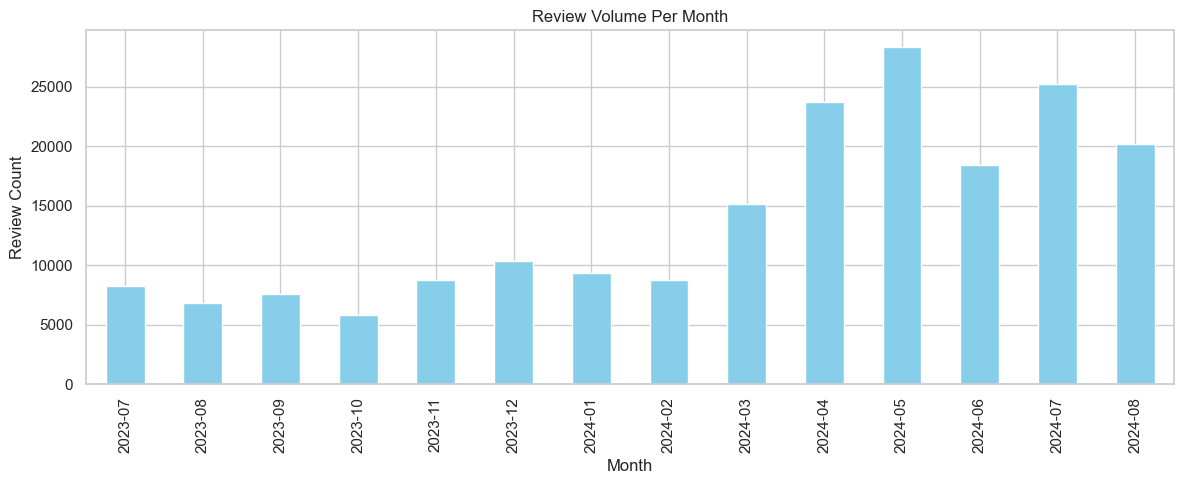

In [12]:
monthly_reviews = df_clean.groupby('Review Month').size()
monthly_reviews.plot(kind='bar', figsize=(12, 5), color='skyblue', title="Review Volume Per Month")
plt.ylabel('Review Count')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

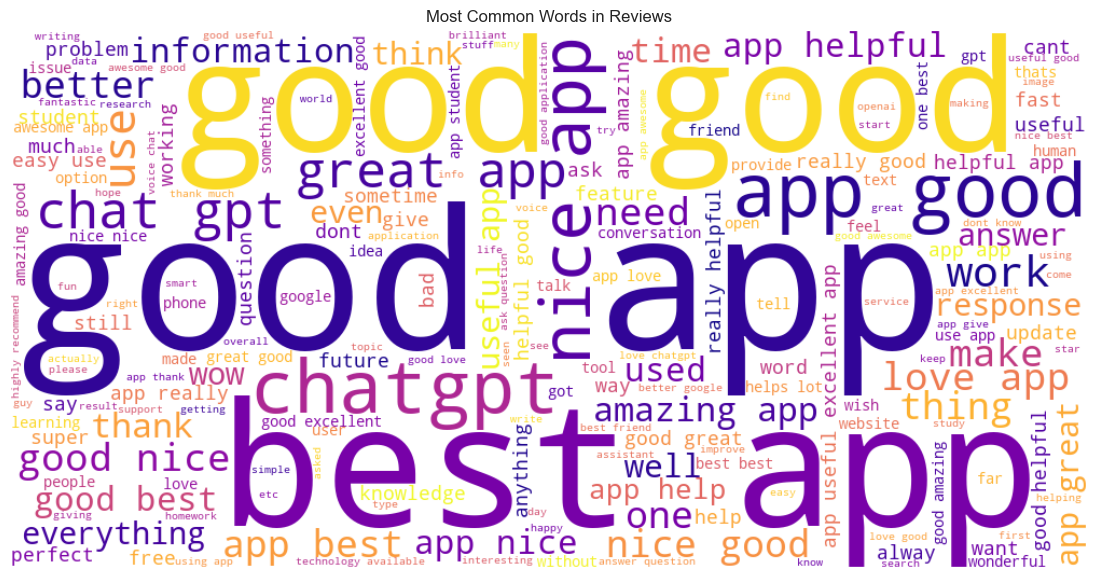

In [13]:
# Join all reviews after converting to string
text = ' '.join(df_clean['Review'].astype(str))

# Lowercase and remove punctuation
text = re.sub(r'[^\w\s]', '', text.lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in text.split() if word not in stop_words and len(word) > 2]

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='plasma').generate(' '.join(filtered_words))

# Display word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()
